<a href="https://colab.research.google.com/github/lmcanavals/topics/blob/main/c04_01_graph_colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-constraint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24082 sha256=a3313b062795864a8ce335c86c664857ee8492ad953dc279f030deb2c8f32b88
  Stored in directory: /root/.cache/pip/wheels/51/36/1f/c2ccb8dc4eba38c5215636d4ae2c480b32069cab0376bcc1a4
Successfully built python-constraint


In [3]:
from constraint import *

# Propositonal logic problem satisfiability

$(p \lor q) \land (p \lor \neg q) \land (\neg p \lor q)$

In [4]:
problem = Problem()

problem.addVariables(['p', 'q'], [False, True])

def constraint(p, q):
    return  (p or q) and (p or not q) and (not p or q)

problem.addConstraint(constraint, ['p', 'q'])

solutions = problem.getSolutions()

for solution in solutions:
    print(solution)

{'p': True, 'q': True}


# Graph coloring

In [46]:
import graphviz as gv

def drawG_al(G, colors):
  colorname = ["red", "orange", "lightblue", "purple", "magenta"]
  graph = gv.Graph("alegria")
  graph.graph_attr["layout"] = "sfdp"
  n = len(G)
  added = set()
  for u in range(n):
    graph.node(str(u), style="filled", color=colorname[colors[u]])
  for u in range(n):
    for v in G[u]:
      if not (f"{u},{v}" in added or f"{v},{u}" in added):
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        graph.edge(str(u), str(v))
  return graph

In [47]:
G = [[1, 4, 5],
     [0, 2, 6],
     [1, 3, 7],
     [2, 4, 8],
     [0, 3, 9],
     [0, 7, 8],
     [1, 8, 9],
     [2, 5, 9],
     [3, 5, 6],
     [4, 6, 7]]

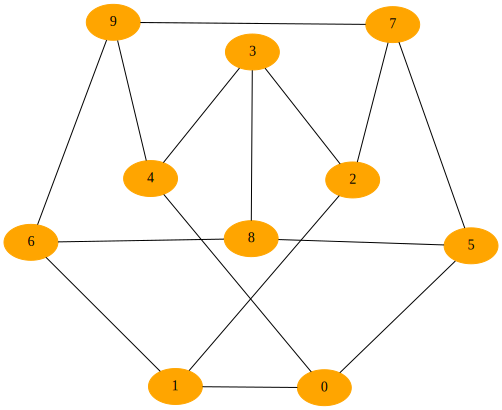

In [48]:
drawG_al(G, [1]*10)

here


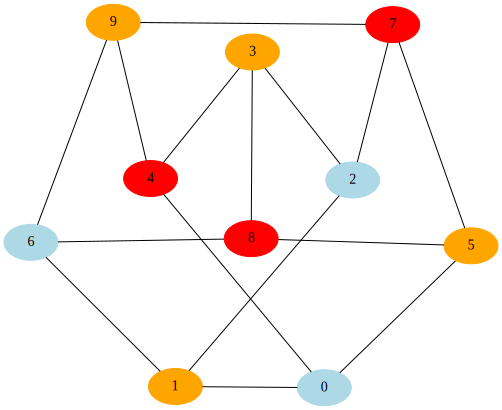

In [51]:
problem = Problem()
n = len(G)
k = 3
problem.addVariables(range(n), range(k))
for u in range(n):
    for v in G[u]:
        problem.addConstraint(lambda x, y: x != y, (u, v))

solution = problem.getSolution()
colors = [-1]*n
if solution:
    print('here')
    colors = [solution[i] for i in range(n)]
    
drawG_al(G, colors)